# Sentiment analysis for Echo Spot using Twitter

## Part 1 Data Gathering

In [91]:
%matplotlib inline

import os
import requests
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from textblob import TextBlob
from timeit import default_timer as timer
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### Gather

In order to authorise our app to access Twitter on our behalf, we need to use the OAuth interface (using tweepy).
Gathering tweets with words 'Echo' and 'Spot' for product 'Echo Spot'

In [2]:
consumer_key = 'E13M01ftcg4NaYjkJJQguKEF9'
consumer_secret = 'ff61gh7Bfzuf0lFPLjXN54RywBVIDQvF9p9aZpb7jaBybdV2Sh'
access_token = '197076175-o8vAHLIwqdZNx3NCdpZTrSK3lLsGdXUmjgFBKTda'
access_secret = '5moI9YXRiGnUjA7RO0RoIrD0enTOc0IEiyPQfRPLAGcoO'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)




Using the query words 'Echo' and 'Spot', query the Twitter API for each tweet's JSON data using Python's Tweepy library then storing each tweet's entire set of JSON data in a file called spot_json.txt file. Each tweet's JSON data is written to its own line.

In [27]:
def get_tweet_json():
    #This function gets the json associated with each tweet 
    
    start = timer() #starting timer to calculate execution time 
    data = []
    count = 0
    
    #getting only original tweets for Echo Spot 
    for tweet in tweepy.Cursor(api.search, q='%23EchoSpot OR \"Echo Spot\" OR \"EchoSpot\"'+ "-filter:retweets" , 
                               lang= 'en',tweet_mode='extended').items():
        
    #print tweet.created_at, tweet.text, tweet.user.id , tweet.user.followers_count
    
        try:
            
            data.append(tweet._json)
            count = count + 1
            print "Tweet %d found\n" %(count)
            if count >= 50000:
                break
        except:
            print 'Failed'
    
    if data: #if list is not empty
        with open('spot_json.txt', 'w') as outfile: #'w' mode to overwrite file if it already has content
            for item in data:
                json.dump(item, outfile)# when used the 'indent' parameter, the o/p file format wasn't json 
                #and wasn't recognized while loading data into dataframe
                outfile.write('\n')  
        
    end = timer() #stop timer
    print '%d Tweets processed ' %count
    print "Total time "
    print (end - start)  
    return None

get_tweet_json()



Tweet 1 found

Tweet 2 found

Tweet 3 found

Tweet 4 found

Tweet 5 found

Tweet 6 found

Tweet 7 found

Tweet 8 found

Tweet 9 found

Tweet 10 found

Tweet 11 found

Tweet 12 found

Tweet 13 found

Tweet 14 found

Tweet 15 found

Tweet 16 found

Tweet 17 found

Tweet 18 found

Tweet 19 found

Tweet 20 found

Tweet 21 found

Tweet 22 found

Tweet 23 found

Tweet 24 found

Tweet 25 found

Tweet 26 found

Tweet 27 found

Tweet 28 found

Tweet 29 found

Tweet 30 found

Tweet 31 found

Tweet 32 found

Tweet 33 found

Tweet 34 found

Tweet 35 found

Tweet 36 found

Tweet 37 found

Tweet 38 found

Tweet 39 found

Tweet 40 found

Tweet 41 found

Tweet 42 found

Tweet 43 found

Tweet 44 found

Tweet 45 found

Tweet 46 found

Tweet 47 found

Tweet 48 found

Tweet 49 found

Tweet 50 found

Tweet 51 found

Tweet 52 found

Tweet 53 found

Tweet 54 found

Tweet 55 found

Tweet 56 found

Tweet 57 found

Tweet 58 found

Tweet 59 found

Tweet 60 found

Tweet 61 found

Tweet 62 found

Tweet 63 found

T

Read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [28]:
with open('spot_json.txt') as f:
    df_json = pd.DataFrame(json.loads(line) for line in f)

df_json.to_csv('spot_json.csv', sep=',', encoding='utf-8', index = False)


In [29]:
list(df_json)


[u'contributors',
 u'coordinates',
 u'created_at',
 u'display_text_range',
 u'entities',
 u'extended_entities',
 u'favorite_count',
 u'favorited',
 u'full_text',
 u'geo',
 u'id',
 u'id_str',
 u'in_reply_to_screen_name',
 u'in_reply_to_status_id',
 u'in_reply_to_status_id_str',
 u'in_reply_to_user_id',
 u'in_reply_to_user_id_str',
 u'is_quote_status',
 u'lang',
 u'metadata',
 u'place',
 u'possibly_sensitive',
 u'quoted_status',
 u'quoted_status_id',
 u'quoted_status_id_str',
 u'retweet_count',
 u'retweeted',
 u'source',
 u'truncated',
 u'user']

In [30]:
df_json['full_text'].head(5)

0    Building for Echo Show and Echo Spot: VUI &amp...
1    Enter to win an @Amazon #EchoSpot from @GeekWi...
2    Enter to win an @Amazon #EchoSpot from @GeekWi...
3    How to Disable the Camera on the Echo Spot htt...
4    #FreeKindleBook [Education &amp; Teaching][Fre...
Name: full_text, dtype: object

In [8]:
df_json.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,truncated,user
0,None,None,Sat Jan 13 08:07:22 +0000 2018,"[0, 279]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,CES showed us smart displays will be the new n...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{u'follow_request_sent': False, u'has_extended..."
1,None,None,Sat Jan 13 08:03:18 +0000 2018,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,Amazon Echo Spot\n\nbuy it 👉 https://t.co/OuW...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{u'follow_request_sent': False, u'has_extended..."
2,None,None,Sat Jan 13 08:02:33 +0000 2018,"[0, 279]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,"Engadget:""CES showed us smart displays will be...",None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{u'follow_request_sent': False, u'has_extended..."
3,None,None,Sat Jan 13 08:01:30 +0000 2018,"[0, 74]","{u'symbols': [], u'user_mentions': [], u'hasht...","{u'media': [{u'source_user_id': 2438173117, u'...",0,False,Amazon Echo Spot\n\nbuy it 👉 https://t.co/4wd...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{u'follow_request_sent': False, u'has_extended..."
4,None,None,Sat Jan 13 07:37:04 +0000 2018,"[0, 227]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,Hmmmm...Politico is from my left leaning echo ...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{u'follow_request_sent': False, u'has_extended..."


In [47]:
df_tweets = df_json.loc[:, ['id','retweet_count','favorite_count','full_text']]

### Assess

In [48]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
id                291 non-null int64
retweet_count     291 non-null int64
favorite_count    291 non-null int64
full_text         291 non-null object
dtypes: int64(3), object(1)
memory usage: 9.2+ KB


In [33]:
s = df_tweets.sample(30)
s.to_csv('spot_sample30.csv', sep=',', encoding='utf-8', index = False)
df_tweets.to_csv('spot_full.csv', sep = ',', encoding = 'utf-8', index = False)
s

,id,retweet_count,favorite_count,full_text
198,950173740595384321,1,2,https://t.co/vQWCVqpAsw Amazon Echo Spot Revie...
92,951305422316756993,1,1,NEW FEATURE: You can now ask Alexa to show you...
101,951186556798341126,0,0,@StuffTV Thanks for your review of Echo Spot. ...
246,949368187983945729,0,3,Enter to win an @Amazon #EchoSpot from @GeekWi...
158,950527198733139968,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...
93,951305066471817216,0,1,3 things I loved about Amazon's newest Echo Sp...
195,950219023475765248,0,0,New blog post: Amazon Echo Spot Review https:/...
196,950193637492629505,0,0,New post (Introducing Echo Spot) has been publ...
244,949377514308284417,127,21,REGISTER NOW: @GoliathSolution live #myCUGC we...
81,951484628740616192,0,0,Building for Echo Show and Echo Spot: VUI &amp...


# Clean Tweets

In [56]:
bkup_copy_df_tweets = df_tweets
df_tweets.head(30)
s1 = df_tweets.head(5)
s1

,id,retweet_count,favorite_count,full_text
0,952610719018766337,0,0,Building for Echo Show and Echo Spot: VUI &amp...
1,952596248367980544,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...
2,952578109492088832,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...
3,952559816152674306,0,0,How to Disable the Camera on the Echo Spot htt...
4,952549940068102144,0,0,#FreeKindleBook [Education &amp; Teaching][Fre...


In [89]:
def clean_tweet_text(df):
    #remove hyperlinks, user mentions and special characters
    for i, row in df.iterrows():
        t = row['full_text']        
        t = re.sub('(\w+:\/\/\S+)', " ",t)# remove hyperlinks
        t = re.sub("(@[A-Za-z0-9]+)", " ",t)#remove user mentions
        t = re.sub("#","", t) #remove hash
        t = re.sub('&amp',' ',t) #remove & which is written as &amp
        t = re.sub('[^0-9a-zA-Z \t]', " ",t) #remove special characters
        t = re.sub('\s+',' ',t).strip() #remove unwanted whitespaces
        
        df['text'].iloc[i] = t
    return df

df_clean_tweets = clean_tweet_text(df_tweets)

In [93]:
df_clean_tweets.head(5)

,id,retweet_count,favorite_count,full_text,text
0,952610719018766337,0,0,Building for Echo Show and Echo Spot: VUI &amp...,Building for Echo Show and Echo Spot VUI GUI B...
1,952596248367980544,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...,Enter to win an EchoSpot from sweeps giveaways
2,952578109492088832,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...,Enter to win an EchoSpot from sweeps giveaways
3,952559816152674306,0,0,How to Disable the Camera on the Echo Spot htt...,How to Disable the Camera on the Echo Spot
4,952549940068102144,0,0,#FreeKindleBook [Education &amp; Teaching][Fre...,FreeKindleBook Education Teaching Free Amazon ...


# Sentiment Analysis

Using TextBlob to analyze tweets' sentiment

In [99]:
def analyze_sentiment(df):
    df_out = pd.DataFrame(columns = ['text','polarity','subjectivity'])
    for i, row in df.iterrows():
        text = row['text']

        #creating aTextBlob object 
        analyze = TextBlob(text) 
        
        #populate output dataframe 
        df_out = df_out.append({'text': text, 
                       'polarity': analyze.sentiment.polarity,
                       'subjectivity': analyze.sentiment.subjectivity},
                      ignore_index = True) 
    return df_out

df_sentiments = analyze_sentiment(df_clean_tweets)

In [101]:
df_sentiments.to_csv('sentiments.csv', sep=',', encoding='utf-8', index = False)

### Clean

In order to clean the dataset let's first create a copy of the dataset and check if it has been populated as expected.

In [243]:
twitter_arc_master_clean = twitter_archive_master.copy()


In [245]:
t = twitter_arc_master_clean.sample(500)
t.to_csv('check.csv', encoding = 'utf-8')

In [246]:
twitter_arc_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 31 columns):
tweet_id                      1997 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1997 non-null object
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1997 non-null object
rating_numerator              1997 non-null int64
rating_denominator            1997 non-null int64
name                          1997 non-null object
doggo                         1997 non-null object
floofer                       1997 non-null object
pupper                        1997 non-null object
puppo                         1997 non-null object
retweet_count                 1997 non

#### Addressing tidiness issue 1
The dog stages 4 columns should actually be just one column 'dog_stage' with 4 options viz. pupper, puppo, doggo, floofer with datatype 'category'

##### Definition
Create new column 'dog_stage' values in columns pupper,puppo,doggo,floofer. 
Then drop the old columns (pupper,puppo,doggo,floofer).

##### Code

In [247]:

def merge_dogstage(df):
    for index, row in df.iterrows():
        stage_list =[]
        stage_list.append([row['doggo'],row['floofer'],row['pupper'],row['puppo']]) 

        for lst in stage_list:
            for stage in lst:
                if stage not in ['None']:
                # this is because iterrows does not provide access to original dataframe but we do have original index!!
                    df.loc[index,'dog_stage'] = stage 
    #deleting old columns
    #print list(df)
    #    patients_clean = patients_clean.drop('contact', axis=1)
    df = df.drop(['pupper','puppo','doggo','floofer'], axis = 1, inplace=True)
    #print list(df)
    print 'Dogstage column created successfully'
    return None

merge_dogstage(twitter_arc_master_clean)
twitter_arc_master_clean.dog_stage = twitter_arc_master_clean.dog_stage.astype('category')


Dogstage column created successfully


##### Test

In [248]:
print list(twitter_arc_master_clean)
twitter_arc_master_clean.dog_stage.unique()

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'description', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage']


[NaN, doggo, puppo, pupper, floofer]
Categories (4, object): [doggo, puppo, pupper, floofer]

#### Addressing tidiness issue #2
The expanded_urls column has same url listed once/twice/thrice depending on number of images uploaded. 

##### Definition
List only one value of the url and make a new column 'count_media' to indicate number of media (photos/vine videos) uploaded for the tweet

Below I am collecting sample test data for testing the code snippet below.


In [249]:
#tweet with id = 807106840509214720 has one expanded_urls. 
#tweet with id = 708810915978854401 has three expanded_urls. 

print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 807106840509214720), 'expanded_urls']
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 708810915978854401), 'expanded_urls']

403    https://twitter.com/dog_rates/status/807106840...
Name: expanded_urls, dtype: object
996    https://twitter.com/dog_rates/status/708810915...
Name: expanded_urls, dtype: object


##### Code

In [250]:
urls = twitter_arc_master_clean.expanded_urls
urls = list(urls)

for i in range(len(twitter_arc_master_clean)):
    
    if type(urls[i]) == str: #exclude nan entries
        
        urls_list = urls[i].split(',')
        num_media = len(urls_list)
        twitter_arc_master_clean.loc[i,'count_media'] = num_media
        unique_urls_list = list(set(urls_list))
        flag = True
        if num_media > 1: #to get rows with multiple links
            for link in unique_urls_list:
                if 'twitter' in link: #if there is a twitter and a non-twitter link choose the twitter link
                    flag = False
                    twitter_arc_master_clean.loc[i,'expanded_urls'] = link

            if flag:
                #print unique_urls_list
                twitter_arc_master_clean.loc[i,'expanded_urls'] = unique_urls_list[0]

##### Test

In [251]:
#testing expanded_urls to see if it contains only one url.
count = 0
for index, row in twitter_arc_master_clean.iterrows():
    #print row.expanded_urls
    if pd.notnull(row.expanded_urls):
        if (',' in row.expanded_urls):
            count = count + 1
            print 'Tweet %d has incorrect expanded_urls %s' %(row.tweet_id, row.expanded_urls)
if count == 0:
    print 'All urls in expanded_urls column are correct!'
else:
    print '%d rows with urls need to be fixed' %count

#twitter_arc_master_clean.sample(100) 


All urls in expanded_urls column are correct!


In [252]:
#testing to see if 'count_media' column has correct number captured.
#tweet with id = 807106840509214720 has one expanded_urls. Thus count_media should have number 1.
#tweet with id = 708810915978854401 has three expanded_urls. Thus count_media should have number 3.

print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 807106840509214720), 'count_media']
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 708810915978854401), 'count_media']

403    1.0
Name: count_media, dtype: float64
996    3.0
Name: count_media, dtype: float64


#### Addressing quality issue #1:
##### Definition
Add the name 'Max' for tweet with ID = 778039087836069888

##### Code

In [253]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 778039087836069888),'name'] = 'Max'

##### Test

In [254]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 778039087836069888),'name']

555    Max
Name: name, dtype: object

#### Addressing quality issue #2
##### Definition
Add 'Roxy' for name (based on IG tag in text) in record with Tweet_id = 887517139158093824 instead of incorrect name = 'such'

##### Code

In [255]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887517139158093824),'name'] = 'Roxy'

In [257]:
#test
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887517139158093824),'name']


24    Roxy
Name: name, dtype: object

#### Addressing quality issue #3
##### Definition
Update 'Canela' under 'name' column for record with Tweet_id = 887473957103951883 instead of NaN.

##### Code

In [258]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887473957103951883),'name'] = 'Canela'

In [259]:
#test
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 887473957103951883),'name']


25    Canela
Name: name, dtype: object

#### Addressing quality issue #4
##### Definition
update name as np.NaN for rows that have incorrectly extracted names included here ['a','the','an','None']

##### Code

In [260]:
for index, row in twitter_arc_master_clean.iterrows():
    if  row['name'] in ['a','the','an','None']:
        #print row['tweet_id'], row['name'], row['description']
        twitter_arc_master_clean.loc[index,'name'] = np.NaN

##### Test

In [263]:
#Records with tweet ids below earlier had following names:
#851591660324737024 None, 881536004380872706 a
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 851591660324737024),'name']
print twitter_arc_master_clean.loc[(twitter_arc_master_clean.tweet_id == 881536004380872706),'name']


167    NaN
Name: name, dtype: object
52    NaN
Name: name, dtype: object


#### Addressing quality issue #5 and 6
##### Definition
Extract correct ratings for numerator and denominator using the description text. Sample correct ratings: 6/10, 11/10, 21/10.

##### Code

In [264]:
for index, row in twitter_arc_master_clean.iterrows():
    denom = row['rating_denominator']
    desc = row['description']
    if pd.notnull(denom) & (denom != 10.0): 
        #print row['rating_numerator'],denom, row['tweet_id']
        regexp = ur'((\d+)/(\d+))'
        result = re.findall(regexp, desc)
        #print result, len(result)
        
        for i in range(len(result)):
            if result[i][-1] in ['10']:    
                twitter_arc_master_clean.loc[index,'rating_numerator'] = float(result[i][-2])
                twitter_arc_master_clean.loc[index,'rating_denominator'] = 10.0
            else:
                twitter_arc_master_clean.loc[index,'rating_numerator'] = np.NaN
                twitter_arc_master_clean.loc[index,'rating_denominator'] = np.NaN


##### Test

In [265]:
count = 0
for index, row in twitter_arc_master_clean.iterrows():
    denom = row['rating_denominator']
    if pd.notnull(denom) & (denom != 10): 
        count = count + 1
        print denom, row['rating_numerator'], row['tweet_id'], row['description']
        
if count==0:
    print 'All denominators are either NaN or 10.0'
else:
    print '%d row(s) has/have denominator that is neither NaN nor 10.' %count

All denominators are either NaN or 10.0


#### Addressing quality issue #7 and 8
##### Definition
#7. Record with Tweet_id = 828011680017821696 actually has two dogs Brutus and Jersey. 
Need to capture info for both and distinguish the two.
#8. Record with Tweet_id = 678396796259975168 actually has two dogs (names not provided). 
Need to capture info for both and distinguish the two.

I DONT know how to resolve this quality issue that is whether I should create an additional row for the second name to keep 1 dog per row but then the tweet_id column would no longer act as a key for the table. 
I also am not sure if should comma separate the two names, as this would violate the rule of one value per cell.


##### Code and Test 
to be added if needed.

#### Addressing quality issue #9

##### Definition
Replace name 'sweet' with 'sweet pea' for record with tweet_id = 825147591692263424

##### Code

In [266]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 825147591692263424), 'name'] = 'sweet pea'

##### Test

In [267]:
twitter_arc_master_clean.loc[(twitter_arc_master_clean['tweet_id']== 825147591692263424), 'name']

301    sweet pea
Name: name, dtype: object

#### Addressing quality issue #10

##### Definition
Replace all missing values indicated by 'None' string (if any) with np.NaN

##### Code

In [268]:
twitter_arc_master_clean.replace({'None': np.NaN},inplace = True)

##### Test

In [272]:
#check if 'None' is present in twitter_arc_master_clean
d = twitter_arc_master_clean.isin(['None']) #returns boolean dataframe 
c = d.drop_duplicates()
if len(c)>1:
    print 'some entries still have ''None' 'value'

#### Addressing quality issue #11

##### Definition
Extract string indicating 'Utility' used to post the tweet. This value is embedded within the url in source column. 
Example: for source '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' we have to extract 'Twitter for iPhone'

##### Code

In [273]:
regex = r'>(.+)<' 

for i, row in twitter_arc_master_clean.iterrows():
    src = row.source
    #print src
    result = re.search(regex, src)
    twitter_arc_master_clean.loc[i,'utility'] = result.group(1)
    

##### Test

In [274]:
print twitter_arc_master_clean.info(), '\n'
#from above result we can see that both source as well utility have 1997 non-null objects

print twitter_arc_master_clean.utility.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 30 columns):
tweet_id                      1997 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1997 non-null object
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1997 non-null object
rating_numerator              1984 non-null float64
rating_denominator            1984 non-null float64
name                          1384 non-null object
retweet_count                 1997 non-null int64
favorite_count                1997 non-null int64
description                   1997 non-null object
jpg_url                       1997 non-null object
img_num                       1997 

#### Addressing quality issue #12:
##### Definition
Correct datatypes for following columns:
- tweet_id is int instead of string
- in_reply_to_status_id, in_reply_to_user_id must string
- timestamp, retweeted_status_timestamp should be datetime
- retweeted_status_id, retweeted_status_user_id must be string

##### Code

In [276]:
# To string
twitter_arc_master_clean.tweet_id = twitter_arc_master_clean.tweet_id.astype('str')
twitter_arc_master_clean.in_reply_to_status_id = twitter_arc_master_clean.in_reply_to_status_id.astype('str')
twitter_arc_master_clean.in_reply_to_user_id = twitter_arc_master_clean.in_reply_to_user_id.astype('str')
twitter_arc_master_clean.retweeted_status_id = twitter_arc_master_clean.retweeted_status_id.astype('str')
twitter_arc_master_clean.retweeted_status_user_id = twitter_arc_master_clean.retweeted_status_user_id.astype('str')

# To datetime
twitter_arc_master_clean.timestamp = pd.to_datetime(twitter_arc_master_clean.timestamp)
twitter_arc_master_clean.retweeted_status_timestamp = pd.to_datetime(twitter_arc_master_clean.retweeted_status_timestamp)

# To int
twitter_arc_master_clean.count_media = twitter_arc_master_clean.count_media.astype('int')

##### Test

In [277]:
twitter_arc_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 30 columns):
tweet_id                      1997 non-null object
in_reply_to_status_id         1997 non-null object
in_reply_to_user_id           1997 non-null object
timestamp                     1997 non-null datetime64[ns]
source                        1997 non-null object
text                          1997 non-null object
retweeted_status_id           1997 non-null object
retweeted_status_user_id      1997 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1997 non-null object
rating_numerator              1984 non-null float64
rating_denominator            1984 non-null float64
name                          1384 non-null object
retweet_count                 1997 non-null int64
favorite_count                1997 non-null int64
description                   1997 non-null object
jpg_url                       1997 non-null object
img_num      

#### Final cleaning steps
Dropping the inaccurate text column as the data is present in description column and then renaming 'description' to 'text'


In [278]:
twitter_arc_master_clean = twitter_arc_master_clean.drop('text', axis = 1) 
#test
twitter_arc_master_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,count_media,utility
1640,672614745925664768,nan,nan,2015-12-04 03:13:46,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/672614745...,6.0,...,False,goldfish,0.258865,False,sea_cucumber,0.002015,False,pupper,1,Twitter for iPhone
330,819924195358416896,nan,nan,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/819924195...,11.0,...,False,shower_curtain,0.091866,False,tub,0.049176,False,doggo,1,Twitter for iPhone
336,819004803107983360,nan,nan,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/819004803...,14.0,...,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,doggo,4,Twitter for iPhone


Renaming 'description' to 'text' column for familiarity


In [279]:
#code
twitter_arc_master_clean.rename(columns={'description': 'text'}, inplace=True) 
#test
list(twitter_arc_master_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'text',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'count_media',
 'utility']

Next, lets write the clean dataframe to a csv file. Remember to add index = False to avoid creating an 'Unnamed' column

In [280]:
twitter_arc_master_clean.to_csv('twitter_archive_master.csv', sep=',', encoding='utf-8', index = False)


## Part 2 Analyze Data

Lets analyze the cleaned dataframe 'twitter_arc_master_clean'

In [286]:
full_twitter_df = twitter_arc_master_clean.copy()

Subsetting the dataframe to include only columns needed for further analysis

In [290]:
twitter_df = full_twitter_df.loc[:, [
 'tweet_id','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count',
 'text','dog_stage','count_media','utility']]

In [291]:
twitter_df.head()

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,text,dog_stage,count_media,utility
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8795,39369,This is Phineas. He's a mystical boy. Only eve...,NaN,1,Twitter for iPhone
1,892420643555336193,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8795,39369,This is Phineas. He's a mystical boy. Only eve...,NaN,1,Twitter for iPhone
2,892177421306343426,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6448,33698,This is Tilly. She's just checking pup on you....,NaN,1,Twitter for iPhone
3,892177421306343426,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6448,33698,This is Tilly. She's just checking pup on you....,NaN,1,Twitter for iPhone
4,891815181378084864,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4274,25393,This is Archie. He is a rare Norwegian Pouncin...,NaN,1,Twitter for iPhone


In [292]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 11 columns):
tweet_id              1997 non-null object
expanded_urls         1997 non-null object
rating_numerator      1984 non-null float64
rating_denominator    1984 non-null float64
name                  1384 non-null object
retweet_count         1997 non-null int64
favorite_count        1997 non-null int64
text                  1997 non-null object
dog_stage             306 non-null category
count_media           1997 non-null int64
utility               1997 non-null object
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 173.8+ KB


In [293]:
twitter_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,count_media
count,1984.000000,1984.0,1997.000000,1997.000000,1997.000000
mean,11.699093,10.0,2768.390586,8948.518277,1.429644
std,40.768892,0.0,4731.550444,12469.489524,0.852135
min,0.000000,10.0,14.000000,81.000000,1.000000
25%,10.000000,10.0,624.000000,1975.000000,1.000000
50%,11.000000,10.0,1352.000000,4114.000000,1.000000
75%,12.000000,10.0,3197.000000,11324.000000,2.000000
max,1776.000000,10.0,78844.000000,131942.000000,5.000000


The max value for rating_numerator is 1776!!!. (After checking we can see that it is correct!)

In [294]:
twitter_df.loc[(twitter_df.rating_numerator == 1776),]

,tweet_id,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,text,dog_stage,count_media,utility
729,749981277374128128,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,2761,5583,This is Atticus. He's quite simply America af....,NaN,1,TweetDeck


## Part 3 Visualize Data

#### Distribution of ratings
First lets split the rating_numerator column into bins and plot the ratings using bar plot

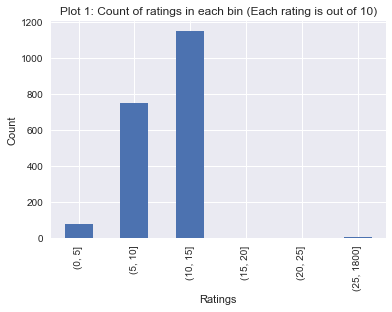

In [295]:
twitter_df['rating_bin'] = pd.cut(twitter_df['rating_numerator'],bins = [0,5,10,15,20,25,1800])

#find the count of ratings in each bin 
grouped_df = twitter_df.groupby('rating_bin')['rating_bin'].count()

grouped_df = grouped_df.plot(kind = 'bar')
grouped_df.set_xlabel("Ratings")
grouped_df.set_ylabel("Count")
grouped_df.set_title('Plot 1: Count of ratings in each bin (Each rating is out of 10)')


As can be seen from the plot #1 above, 
- around 1150 of the users (approx. 57%) rated dogs in range (10,15] i.e. above 10 but less or equal to 15. 
- around 750 users (approx. 37%) rated dogs in the range (5,10]
- around 80 users rated dogs in the range (0,5].
- there is one outlier with rating 1776/10.

#### Analyzing Dog stages

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_stage, dtype: int64


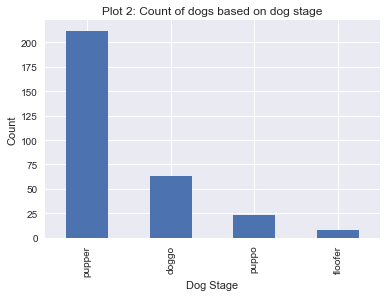

In [297]:
count_stages = twitter_df.dog_stage.value_counts()
print count_stages
stage = count_stages.plot(kind = 'bar')

stage.set_xlabel("Dog Stage")
stage.set_ylabel("Count")
stage.set_title('Plot 2: Count of dogs based on dog stage')

Out of the total 306 tweets that indicate dog_stage:
- around 210 (approx. 68%) have 'pupper' stage 
- around 60 (approx. 20%) have 'doggo' stage
- around 20 (approx. 6%) have 'puppo' stage
- around 10 (approx. 3%) have 'floofer' stage


Analyzing how the favorite_count changes based on dog_stage

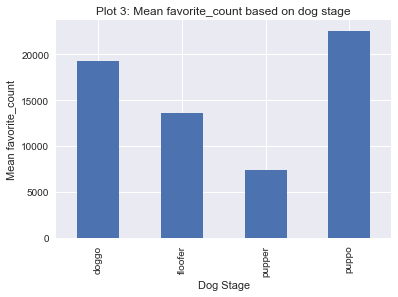

In [298]:
grouped_df = twitter_df.groupby(['dog_stage'])['favorite_count'].mean()

fav = grouped_df.plot(kind="bar")
fav.set_xlabel("Dog Stage")
fav.set_ylabel("Mean favorite_count")
fav.set_title('Plot 3: Mean favorite_count based on dog stage')

Based on plot 3, we see that dogs in 'puppo' stage have highest number of mean favorite_count, followed by 'doggo', then 'floofer' and 'pupper'.
